In [26]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
# Load the training and test datasets
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [28]:
# Function to one-hot encode specified categorical columns
def hot_encode_columns(original_df, columns):
    """
    One-hot encode specified columns and concatenate them back to the original DataFrame.

    Args:
    original_df (DataFrame): The original DataFrame.
    columns (list): A list of column names to be one-hot encoded.

    Returns:
    DataFrame: The modified DataFrame with original columns replaced by their one-hot encoded versions.
    """
    original_df = original_df.copy()
    print([*columns])
    encoded_df = pd.get_dummies(original_df.loc[:, columns])
    original_df.drop(columns, axis=1, inplace=True)
    return pd.concat([original_df, encoded_df], axis=1)


In [29]:
# Apply one-hot encoding to the 'Sex' and 'Embarked' columns
train_df = hot_encode_columns(train_df, ['Sex', 'Embarked'])
test_df = hot_encode_columns(test_df, ['Sex', 'Embarked'])

['Sex', 'Embarked']
['Sex', 'Embarked']


In [30]:
# Print the columns of the train DataFrame to verify encoding
print(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [31]:
# Get info about the DataFrame to check types and non-null counts
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Sex_female   891 non-null    bool   
 11  Sex_male     891 non-null    bool   
 12  Embarked_C   891 non-null    bool   
 13  Embarked_Q   891 non-null    bool   
 14  Embarked_S   891 non-null    bool   
dtypes: bool(5), float64(2), int64(5), object(3)
memory usage: 74.1+ KB


In [32]:
# Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


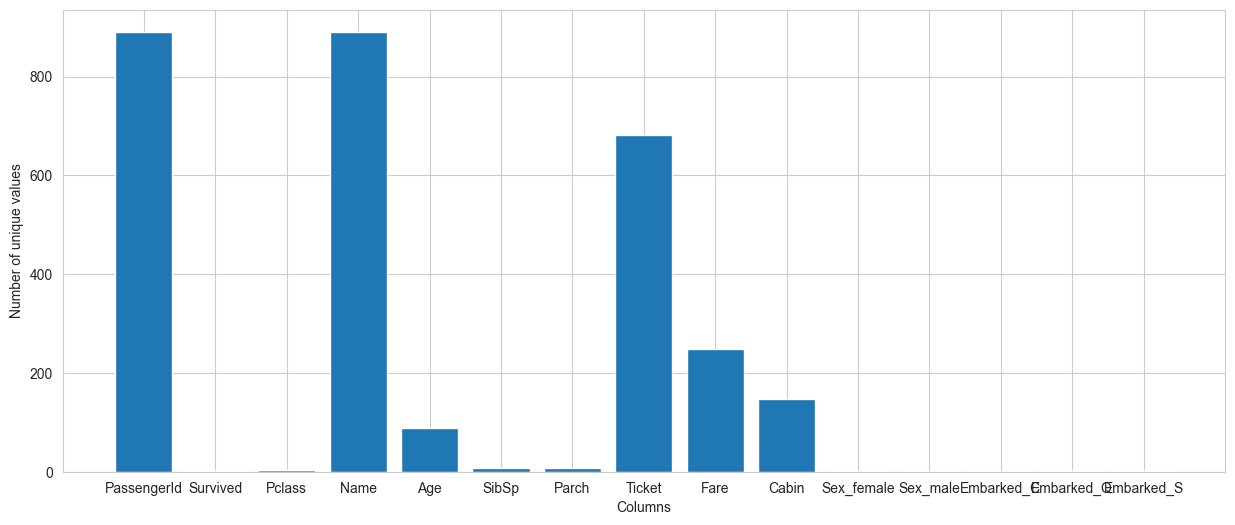

In [33]:
# Plot the number of unique values for each column in the dataset
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(train_df.columns, train_df.nunique())
ax.set_xlabel('Columns')
ax.set_ylabel('Number of unique values')
plt.show()

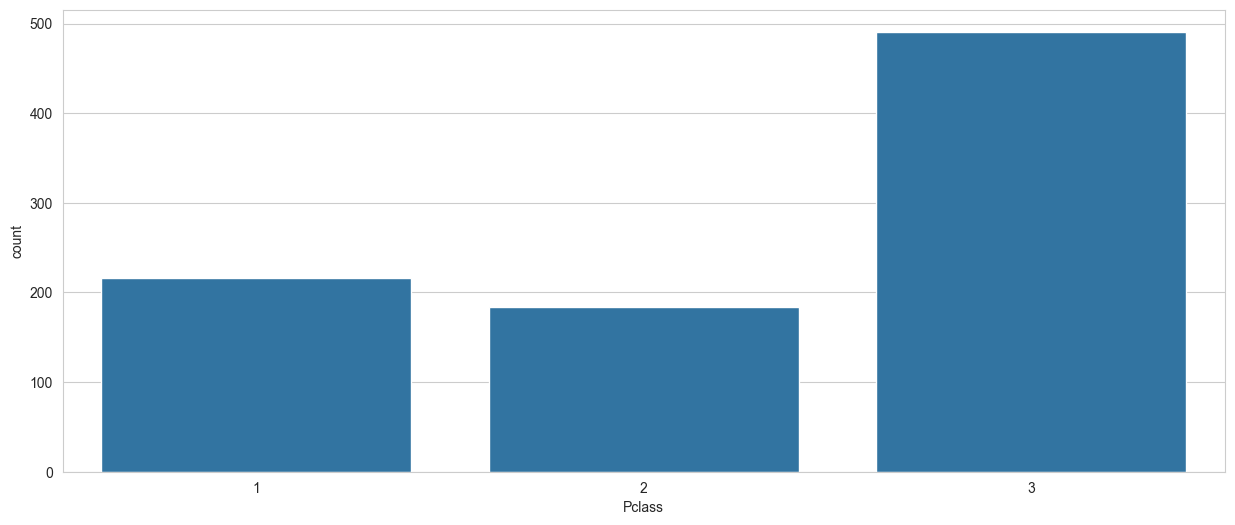

In [34]:
# Plot the distribution of values in the 'Pclass' column
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='Pclass', data=train_df, ax=ax)
plt.show()

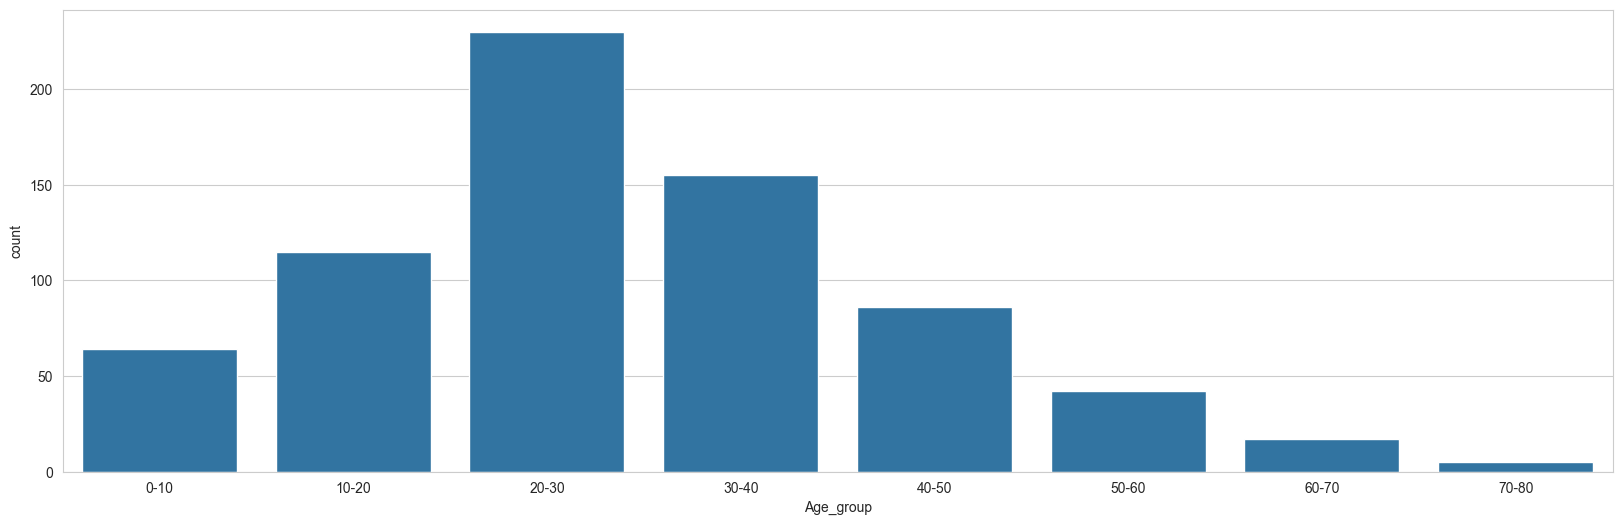

In [35]:
# Plot the distribution of age groups
fig, ax = plt.subplots(figsize=(20, 6))
copied_df = train_df.copy()
copied_df['Age_group'] = pd.cut(copied_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
sns.countplot(x='Age_group', data=copied_df, ax=ax)
plt.show()

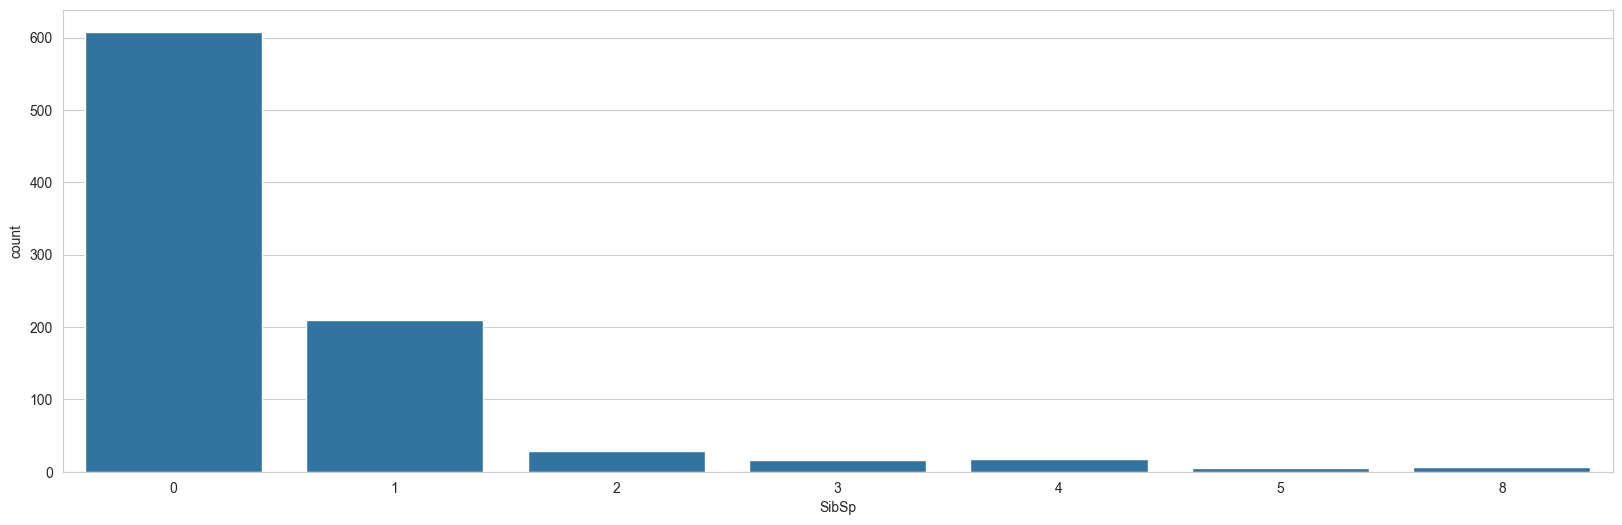

In [36]:
# Plot the distribution of siblings and spouses aboard
fig, ax = plt.subplots(figsize=(20, 6))
sns.countplot(x='SibSp', data=train_df, ax=ax)
plt.show()

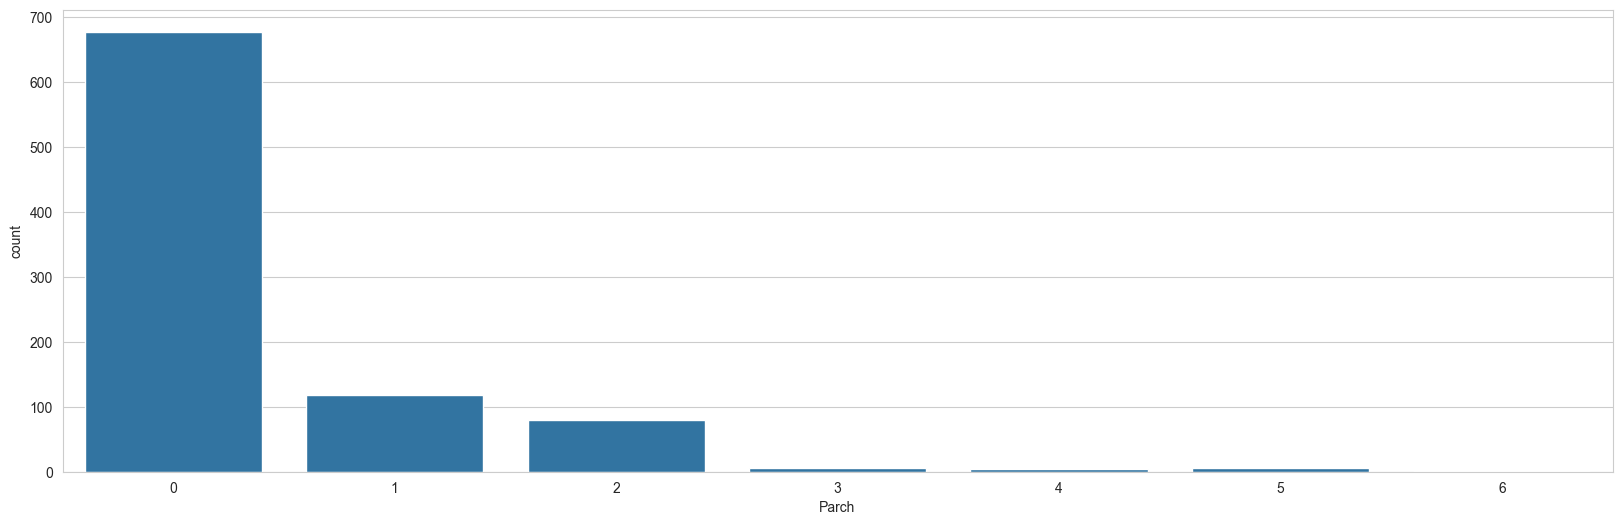

In [37]:
# Plot the distribution of parents and children aboard
fig, ax = plt.subplots(figsize=(20, 6))
sns.countplot(x='Parch', data=train_df, ax=ax)
plt.show()


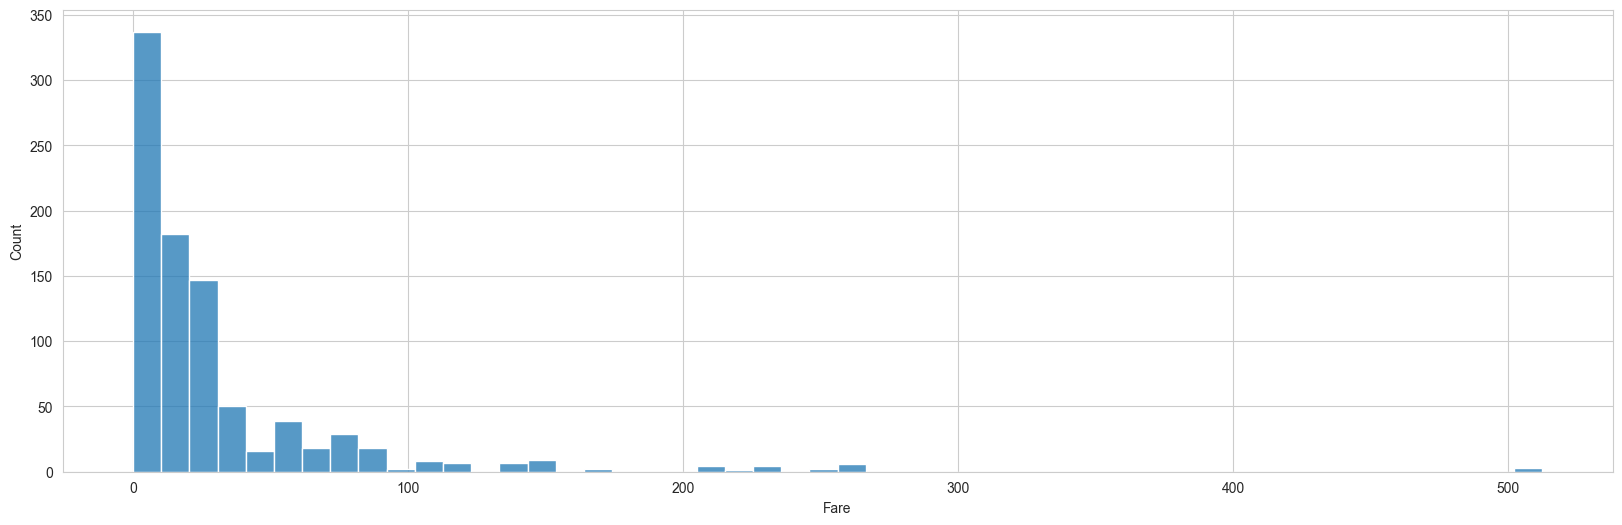

In [38]:
# Plot the distribution of fares
fig, ax = plt.subplots(figsize=(20, 6))
sns.histplot(x='Fare', data=train_df, ax=ax, bins=50)
plt.show()

In [39]:
# Drop columns that don't provide useful information or are highly skewed
train_df.drop(['Ticket', 'Cabin', 'Name', 'SibSp', 'Parch'], axis=1, inplace=True)
test_df.drop(['Ticket', 'Cabin', 'Name', 'SibSp', 'Parch'], axis=1, inplace=True)


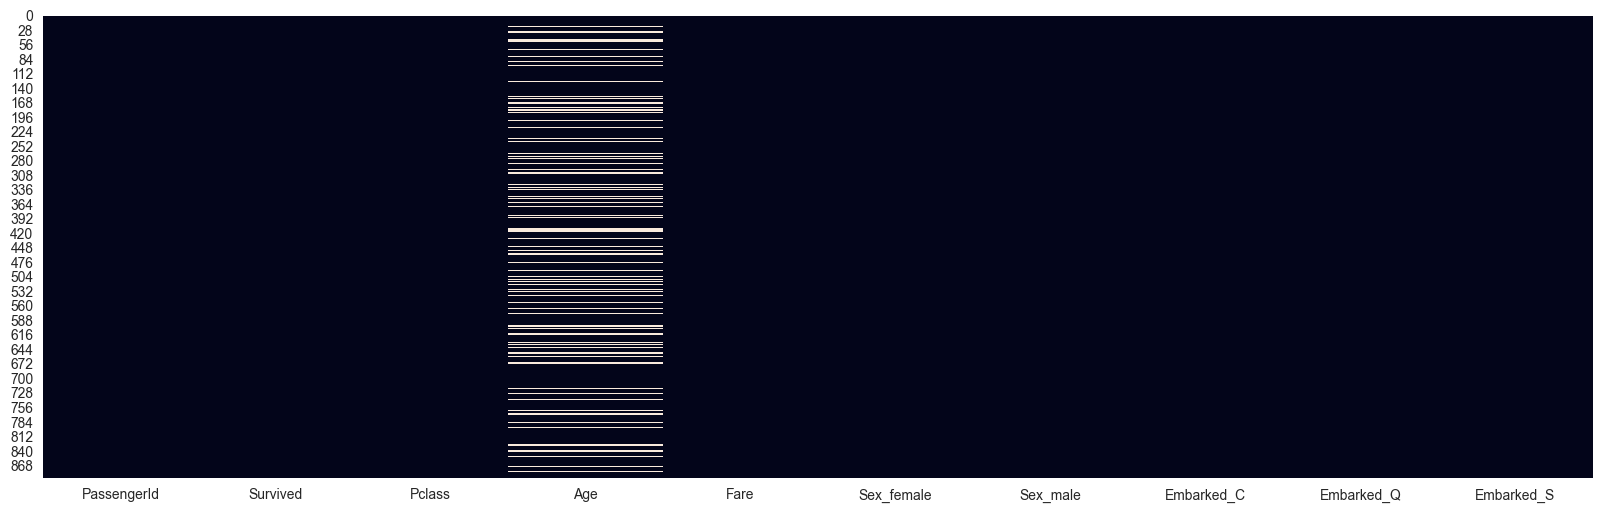

In [40]:
# Display heatmap of missing values in the train DataFrame
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(train_df.isnull(), cbar=False, ax=ax)
plt.show()

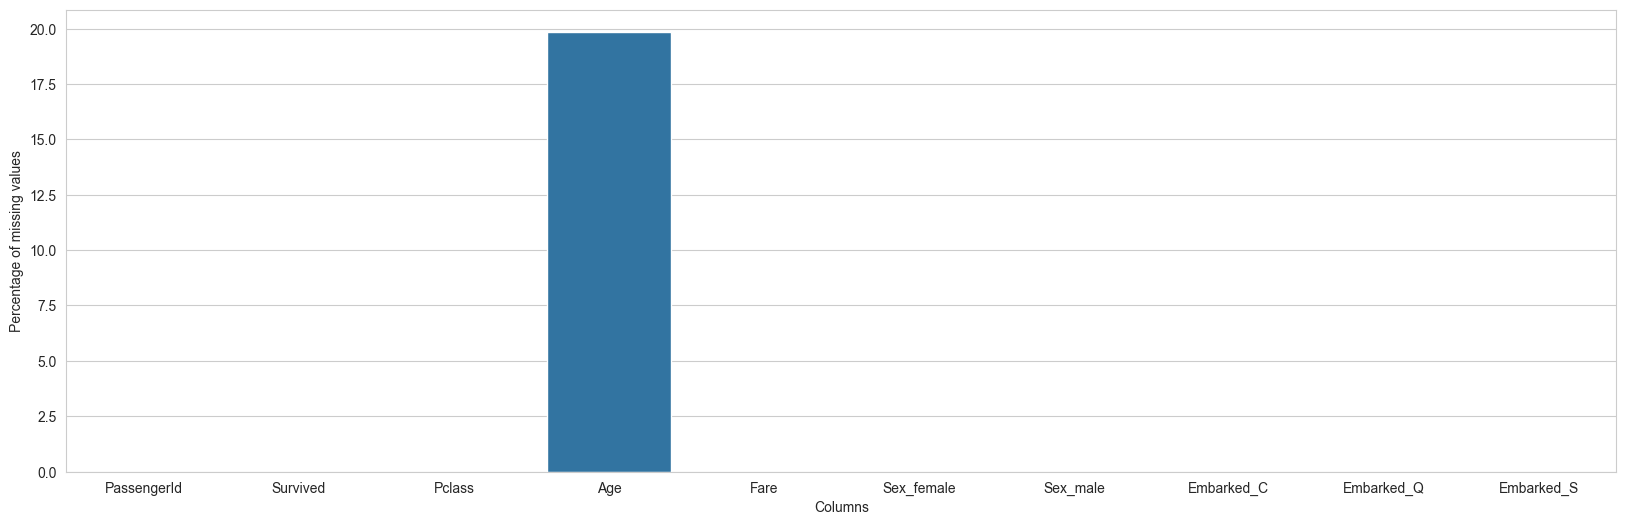

In [41]:
# Display a bar plot of the percentage of missing values in each column
fig, ax = plt.subplots(figsize=(20, 6))
missing_values = train_df.isnull().sum() / train_df.shape[0] * 100
sns.barplot(x=missing_values.index, y=missing_values, ax=ax)
plt.ylabel('Percentage of missing values')
plt.xlabel('Columns')
plt.show()

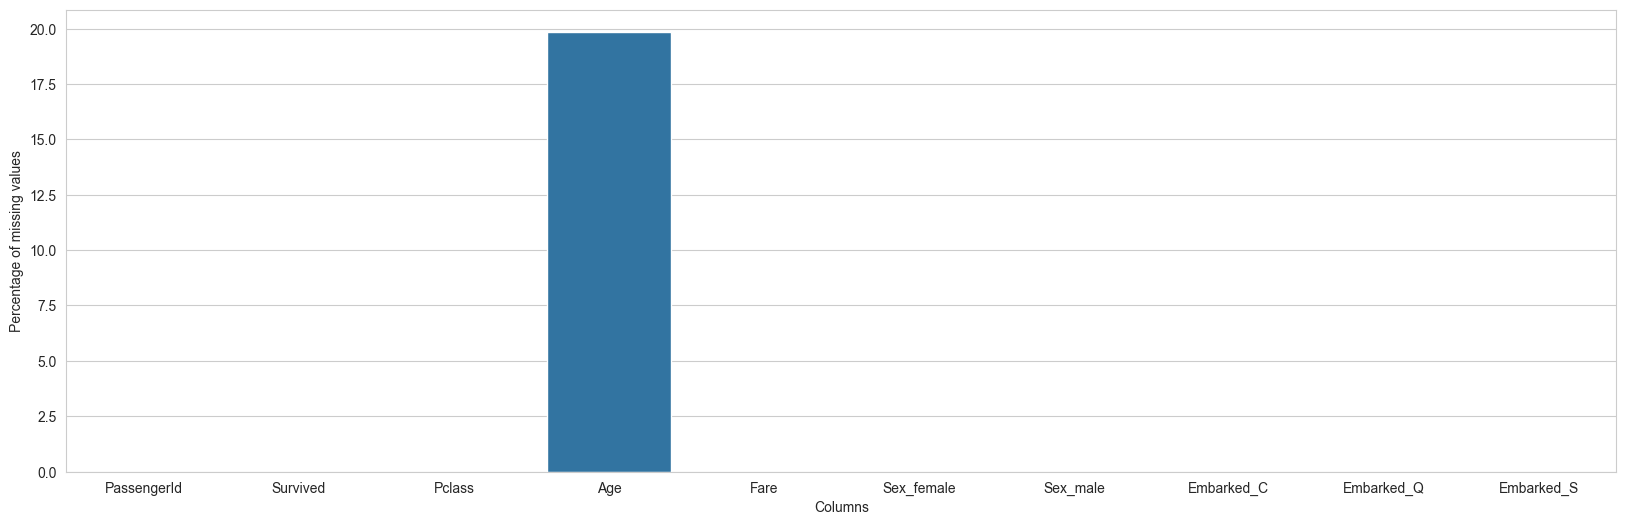

In [42]:
# Display a bar plot of the percentage of missing values in each column
fig, ax = plt.subplots(figsize=(20, 6))
missing_values = train_df.isnull().sum() / train_df.shape[0] * 100
sns.barplot(x=missing_values.index, y=missing_values, ax=ax)
plt.ylabel('Percentage of missing values')
plt.xlabel('Columns')
plt.show()

In [43]:
# Fill missing values using the median of each column
train_df.fillna(train_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)

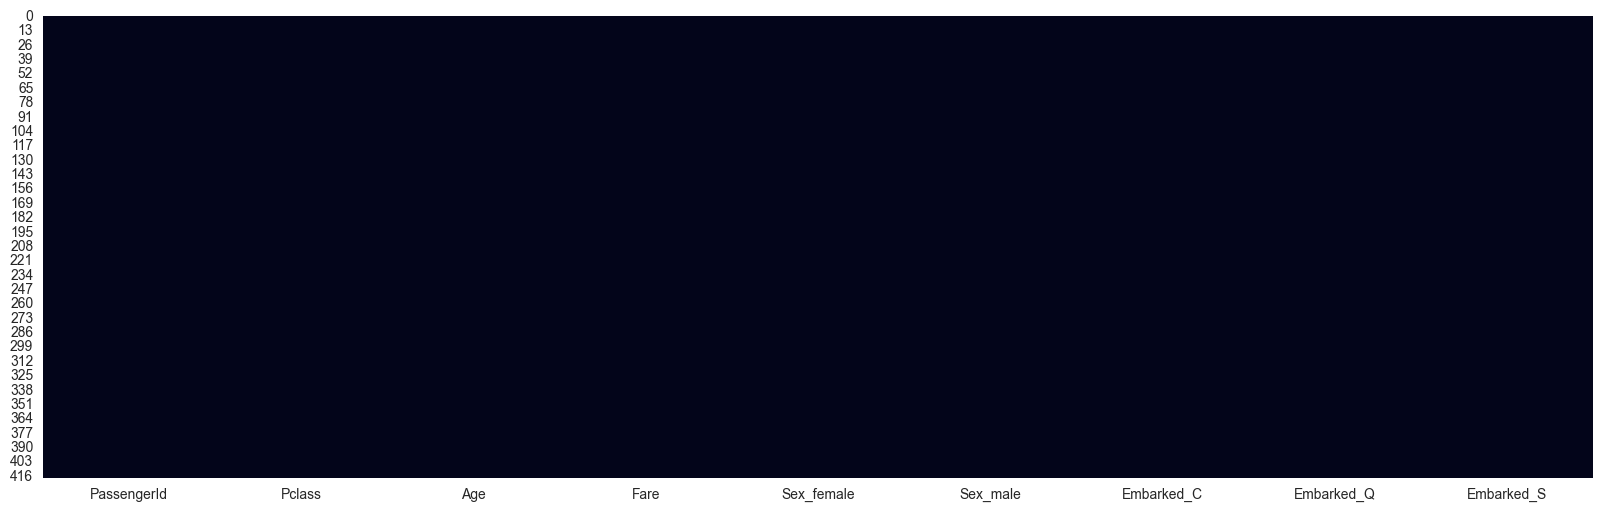

In [44]:
# Display heatmap of missing values in the test DataFrame
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(test_df.isnull(), cbar=False, ax=ax)
plt.show()

In [45]:
# Split data into features and target
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

In [46]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [47]:
# Initialize and train an XGBoost classifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [48]:
# Predict on the testing set
y_pred = model.predict(X_test)

In [49]:
# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7932960893854749


In [50]:
# Prepare and save the submission file
submissions_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': model.predict(test_df)})
submissions_df.to_csv('./submissions/submission_1.csv', index=False)

### Conclusion for the First Approach Using XGBoost with Median Imputation
This Python script provides an organized way to preprocessing and analyzing the Titanic dataset to estimate survival rates using the XGBoost classifier. The technique is distinguished by the following important processes, each of which contributes to data preparation and predictive model building:


1. **Data Preprocessing**: 
    - **One-Hot Encoding**: Categorical variables like 'Sex' and 'Embarked' are translated into a format appropriate for machine learning models using one-hot encoding. This phase is critical since most machine learning algorithms require numerical data.
   - **Dropping Columns**: The script removes columns like 'Ticket', 'Cabin', 'Name', 'SibSp', and 'Parch'. These columns are deleted because they have a large cardinality, numerous unique values, or sparse data, which may complicate the model without boosting its predictive power.
2. **Data Visualization**: 
    - **Insights on Distribution**: Several charts are generated to show the distribution of various variables such as 'Pclass', age groups, siblings/spouses aboard, parents/children aboard, and fares. These visualizations aid in understanding the data's structure and underlying trends, which is critical for informed feature engineering and modeling.
3. **Handling Missing Values**:
    - **Median Imputation** Missing values in the dataset are filled with the medians of each column. Median is preferred over mean because it is more resilient to outliers, which is especially relevant considering the skewness found in some variables such as 'Fare'.


4. **Modeling with XGBoost**: 
    - **Model Training**: The XGBoost classifier is used due to its high performance and efficiency with structured data. XGBoost is a popular choice since it can manage a variety of data abnormalities such as missing values and variable feature sizes while also increasing model resilience through ensemble learning.
   - **Model evaluation**: The model's accuracy is measured using a held-out test set, which provides a simple metric for evaluating the model's performance.

5. **Prediction and Submission**: 
    - **Prediction on Test Data**: The trained model predicts survival on an unknown test dataset. These predictions are generated using the competition's submission method.

   - **Submission File Creation**: Predictions are saved to a CSV file, which is structured for submission and demonstrates the model's practical use in generating actionable insights.

## Overall Evaluation

This technique methodically addresses the issues of categorical and missing data, employs a powerful classification algorithm, and assures that the outputs are ready for practical use. The implementation of XGBoost, together with careful preprocessing and validation stages, provides a solid platform for reaching high predicted accuracy. This structured strategy not only seeks for high accuracy, but also reduces the likelihood of overfitting due to careful feature management and the resilience given by XGBoost's ensemble technique. The end result is a model that is well-prepared to generate accurate predictions on the Titanic survival dataset, and it can be reliably submitted to predictive modeling contests.
